<a href="https://colab.research.google.com/github/phakornintt/channel_network_extraction/blob/main/Tutorial_SeniorProject_Channel_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Channel_Extraction

This is result of my senior project!

If you want to get my model to train your data. 

please feel free to get it!

## Step1:Install MMDetection

In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html
# !pip install -U torch==1.8.0+cu111 torchvision==0.9.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
!pip install mmcv-full

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

# install Pillow 7.0.0 back in order to avoid bug in colab
!pip install Pillow==7.0.0

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4MB 25kB/s 
     |████████████████████████████████| 6.7MB 53.9MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.5.1+cu101 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
     |████████████████████████████████| 296kB 14.6MB/s 
     |████████████████████████████████| 194kB 26.1MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.4-cp37-cp37m-linux_x86_64.whl size=24823393 sha256=2a1daa1d56eafcd346a0bc438989bc56f2c054c3f9eb376f9a8e7850991adaf8
  Stored in directory: /root/.cache/pip/wheels/d4/39/64/573a0673de0ee0c6b699dddfae8232d485ea8da749caa198fd
Successfully built mmcv-full
Cloni

In [3]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.5.1+cu101 True
2.12.0
11.0
GCC 7.5


### Download trained model parameters

In [34]:
!mkdir checkpoints
!wget -c https://mmdatasets.s3-ap-southeast-1.amazonaws.com/faster_rcnn_r50_mAP0.7_v6.pth \
      -O checkpoints/faster_rcnn_r50_mAP0.7_v6.pth
!wget https://mmdatasets.s3-ap-southeast-1.amazonaws.com/faster_rcnn_r50_caffe_fpn_mstrain.py
!wget https://mmdatasets.s3-ap-southeast-1.amazonaws.com/faster_rcnn_r50_fpn.py

mkdir: cannot create directory ‘checkpoints’: File exists
--2021-05-14 09:40:05--  https://mmdatasets.s3-ap-southeast-1.amazonaws.com/faster_rcnn_r50_mAP0.7_v6.pth
Resolving mmdatasets.s3-ap-southeast-1.amazonaws.com (mmdatasets.s3-ap-southeast-1.amazonaws.com)... 52.219.124.199
Connecting to mmdatasets.s3-ap-southeast-1.amazonaws.com (mmdatasets.s3-ap-southeast-1.amazonaws.com)|52.219.124.199|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2021-05-14 09:40:06--  https://mmdatasets.s3-ap-southeast-1.amazonaws.com/faster_rcnn_r50_caffe_fpn_mstrain.py
Resolving mmdatasets.s3-ap-southeast-1.amazonaws.com (mmdatasets.s3-ap-southeast-1.amazonaws.com)... 52.219.124.199
Connecting to mmdatasets.s3-ap-southeast-1.amazonaws.com (mmdatasets.s3-ap-southeast-1.amazonaws.com)|52.219.124.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1507 (1.5K) [binary/octet-stre

In [199]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# Choose to use a config and initialize the detector
# config = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py'
config = './faster_rcnn_r50_caffe_fpn_mstrain.py'
# Setup a checkpoint file to load
checkpoint = 'checkpoints/faster_rcnn_r50_mAP0.7_v6.pth'
# initialize the detector
model = init_detector(config, checkpoint, device='cuda:0')

Use load_from_local loader


## Step3: upload your input images

In [200]:
# Use the detector to do inference
img = '/content/d/041.jpg'    # please change directory of input image
result = inference_detector(model, img)

/content/mmdetection/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


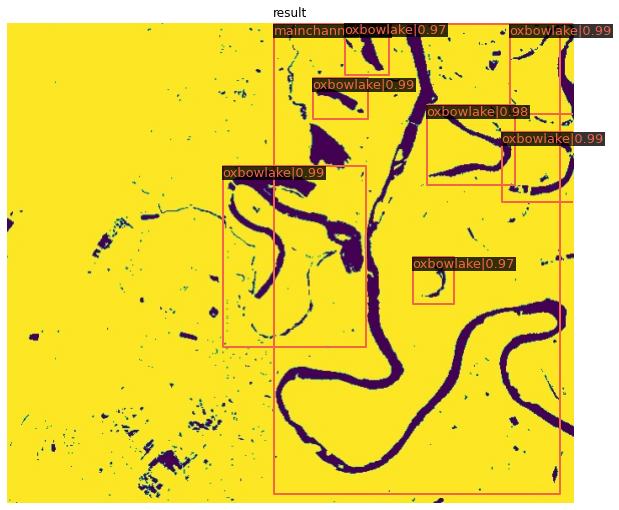

In [201]:
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.9)

In [202]:
# If you want to download the result please execute this cell

import os 

if os.path.isdir("/content/mmdetection/output") == True:
  pass
else:
  !mkdir output

model.show_result(img, result, out_file='output/%s'%img[9:], score_thr= 0.9)

## **Step4: Collect predicted bounding box coordinate to csv file**

In [203]:
import pandas as pd
import os
import numpy as np
import mmcv

# initialize dataframe
# df = pd.DataFrame({"image_name":[],"class":[],"num":[],"ymax":[],"ymin":[],"xmax":[],"xmin":[],"prob":[]})
df = pd.DataFrame({"image_name":[],"class":[],"num":[],"xmin":[],"ymin":[],"xmax":[],"ymax":[],"prob":[]})

### Excecute the code below for collect coordinate to Dataframe

In [204]:
directory = r'/content/d/' # Please change the images directory
for filename in os.listdir(directory):

  img = mmcv.imread(directory+filename)

  result = inference_detector(model, img)

  i=1
  for r in result[0]:      # main_channel
    if r[4] > 0.9:

      r = np.reshape(r,[1,5])
      listofdata = np.array([filename,"main_channel",i])
      listofdata = np.append(listofdata,r)
      listofdata = np.reshape(listofdata,[1,8])
      df_test = pd.DataFrame(listofdata, columns =df.columns)
      df = df.append(df_test, ignore_index=True)   
    i+=1
  i=1    
  for r in result[1]:    # oxbow_lake
    if r[4] > 0.9:
      r = np.reshape(r,[1,5])
      listofdata = np.array([filename,"oxbow_lake",i])
      listofdata = np.append(listofdata,r)
      listofdata = np.reshape(listofdata,[1,8])
      df_test = pd.DataFrame(listofdata, columns =df.columns)
      df = df.append(df_test, ignore_index=True)   
    i+=1  

# columns_titles = ["image_name","class","num","xmin","ymin","xmax","ymax","prob"]
# df=df.reindex(columns=columns_titles)

In [205]:
df

,image_name,class,num,xmin,ymin,xmax,ymax,prob
0,041.jpg,main_channel,1,266.76813,1.5508667,552.54285,471.84833,0.9894098
1,041.jpg,oxbow_lake,1,494.41418,109.06119,566.0,179.047,0.9913257
2,041.jpg,oxbow_lake,2,305.59598,55.500816,360.82516,96.358925,0.99120647
3,041.jpg,oxbow_lake,3,502.28094,1.3768524,566.0,91.55379,0.987421
4,041.jpg,oxbow_lake,4,215.8966,143.93217,358.41095,324.19183,0.9872186
5,041.jpg,oxbow_lake,5,419.11136,82.56144,507.47067,162.40984,0.9795155
6,041.jpg,oxbow_lake,6,405.1378,234.52364,446.46017,281.6827,0.974307
7,041.jpg,oxbow_lake,7,337.4823,0.0,381.9338,52.593235,0.9727147


### Export to csv

In [206]:
df.to_csv('test_lr0.0025_thr0.9_v9.csv', index=False) # please named your .csv file

# **Step5:Calculate water surface**

## Crop the input images from csv file

In [207]:
import PIL.Image

In [208]:
df_2 = pd.read_csv("test_lr0.0025_thr0.9_v9.csv")
df_2

,image_name,class,num,xmin,ymin,xmax,ymax,prob
0,041.jpg,main_channel,1,266.76813,1.550867,552.54285,471.848330,0.989410
1,041.jpg,oxbow_lake,1,494.41418,109.061190,566.00000,179.047000,0.991326
2,041.jpg,oxbow_lake,2,305.59598,55.500816,360.82516,96.358925,0.991206
3,041.jpg,oxbow_lake,3,502.28094,1.376852,566.00000,91.553790,0.987421
4,041.jpg,oxbow_lake,4,215.89660,143.932170,358.41095,324.191830,0.987219
5,041.jpg,oxbow_lake,5,419.11136,82.561440,507.47067,162.409840,0.979516
6,041.jpg,oxbow_lake,6,405.13780,234.523640,446.46017,281.682700,0.974307
7,041.jpg,oxbow_lake,7,337.48230,0.000000,381.93380,52.593235,0.972715


In [209]:
for index , row in df_2.iterrows():
    for filename in os.listdir(directory):
        if row[0] == filename:
            img = PIL.Image.open(directory+filename)
            left = row['xmin']
            top = row['ymin']
            right = row['xmax']
            bottom = row['ymax']
            crop = img.crop((left, top, right, bottom))
            crop.show()
            if os.path.isdir("/content/mmdetection/crop_output") == True:
              pass
            else:
              !mkdir crop_output
            crop.save('/content/mmdetection/crop_output/'+ str(row['class']) + '_'+ str(row['num'])+'_'+filename[0:-4]+'.png')

# **Step6:Image segmentation (Thongsang et al. 2021)**

In [210]:
import matplotlib.pyplot as plt 
import matplotlib as mpl
import sys
import cv2

from skimage import exposure 
from skimage.measure import label, regionprops
from sklearn.cluster import KMeans

In [225]:
def compute_kmeans(data, number_of_classes, plot):
	images_2D = data[:, :]
	vector_data = images_2D.reshape(-1, 1) # flatten matrix to vector for each band (row * col, 3) 
	random_centroid = 42 # interger number range 0-42
	kmeans = KMeans(n_clusters = number_of_classes, random_state = random_centroid).fit(vector_data)
	kmeans = kmeans.cluster_centers_[kmeans.labels_]
	kmeans = kmeans.reshape(images_2D.shape)
	if plot == 'yes':
		plt.imshow(kmeans)
	elif plot == 'no':
		pass
	return kmeans

def image_segmentation(kmeans,level, save_file,oxb):
	# binary = np.where(kmeans >= kmeans.max()/2, 0, 1)
	# binary = convert_array_to_binary(kmeans)
	dummy = np.unique(kmeans)
	binary = np.where(kmeans > dummy[0], 0, 1)
	#? begin image segmentation
	label_out = label(binary, connectivity=1, return_num=False)
	collect = []
	index = 0
	for region in regionprops(label_out):
		(min_row, min_col, max_row, max_col) = region.bbox
		collect.append([region.area,region.bbox])
	collect = sorted(collect,reverse=True)
	
	for area in collect[level:]:
		(min_row, min_col, max_row, max_col) = area[1]
		binary[min_row:max_row, min_col:max_col] = 0
	for area in collect[0:level]:
		if area[0] < 100:
			(min_row, min_col, max_row, max_col) = area[1]
			binary[min_row:max_row, min_col:max_col] = 0
	# print(binary.shape[0],binary.shape[1])
	# print(collect)
	plt.imshow(binary,cmap='viridis_r')
	plt.tight_layout()
 
	return binary
 

def count_number_of_pixel(cleaned_kmeans):
	cleaned_kmeans = cleaned_kmeans.flatten()
	count = 0
	for i in range (0, len(cleaned_kmeans)):
		if cleaned_kmeans[i] == 1.:
			count += 1
	return count

In [228]:
directory = "/content/mmdetection/crop_output/"

if os.path.isdir("/content/mmdetection/result") == True:
    pass
else:
    !mkdir result

df_3 = pd.DataFrame({"filename":[],"water_surface(m^2)":[]})
df_3

,filename,water_surface(m^2)


Completed..! please check the image in result folder on the left side


,filename,water_surface(m^2)
0,oxbow_lake_2_041.png,36600.0
1,oxbow_lake_4_041.png,373000.0
2,oxbow_lake_7_041.png,53600.0
3,oxbow_lake_1_041.png,58300.0
4,oxbow_lake_6_041.png,14700.0
5,oxbow_lake_3_041.png,68400.0
6,main_channel_1_041.png,1202800.0
7,oxbow_lake_5_041.png,100700.0


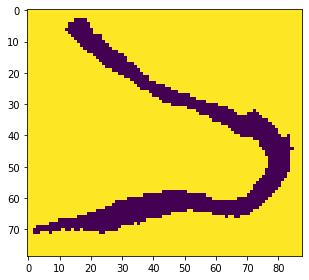

In [229]:
for filename in os.listdir(directory):
    if filename[0] == "o": # specific oxbowlake
        img = cv2.imread(directory+filename,2)
        kmeans = compute_kmeans(img,2,'no')
        min_pixel, max_pixel = 0,50
        cleaned_kmeans = image_segmentation(kmeans,2, 'test.svg','on')
        plt.savefig('/content/mmdetection/result/'+filename[:-4]+'.png',format = "png")
        # print(type(cleaned_kmeans))
        n_pix = count_number_of_pixel(cleaned_kmeans)
        water_surface = n_pix*100
        df_3 = df_3.append({"filename":filename,"water_surface(m^2)":water_surface}, ignore_index=True)
    else: #main channel
        img = cv2.imread(directory+filename,2)
        kmeans = compute_kmeans(img,2,'no')
        cleaned_kmeans = image_segmentation(kmeans,3, 'test.svg','off')
        plt.savefig('/content/mmdetection/result/'+filename[:-4]+'.png',format = "png")
        n_pix = count_number_of_pixel(cleaned_kmeans)
        water_surface = n_pix*100
        df_3 = df_3.append({"filename":filename,"water_surface(m^2)":water_surface}, ignore_index=True)
print("Completed..! please check the image in result folder on the left side")
df_3

In [ ]:
df_3.to_csv('xxxxx.csv', index=False) # please named your .csv file